<a href="https://colab.research.google.com/github/NgcLog2810/Telecom_Billing_Anomaly/blob/main/Telecom_Billing_Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Các thư viện cần thiết

In [ ]:
# =================================================================
# 1. NHÓM THƯ VIỆN XỬ LÝ DỮ LIỆU (Data Processing)
# =================================================================
import pandas as pd
import numpy as np
# =================================================================
# 2. NHÓM THƯ VIỆN TRỰC QUAN HÓA (Data Visualization - Dùng cho EDA)
# =================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# =================================================================
# 3. NHÓM TIỀN XỬ LÝ DỮ LIỆU (Data Preprocessing)
# =================================================================
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# =================================================================
# 4. NHÓM HUẤN LUYỆN MÔ HÌNH AI (Machine Learning Models)
# =================================================================
# Bạn có thể dùng các mô hình từ cơ bản đến nâng cao sau:
from sklearn.tree import DecisionTreeClassifier       # ID3
from sklearn.ensemble import RandomForestClassifier   # RFC
from sklearn.ensemble import IsolationForest          # Mô hình chuyên biệt để PHÁT HIỆN BẤT THƯỜNG (Anomaly Detection)

# =================================================================
# 5. NHÓM ĐÁNH GIÁ MÔ HÌNH (Model Evaluation)
# =================================================================
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

print("Đã khai báo xong tất cả thư viện cho dự án!")

Đã khai báo xong tất cả thư viện cho dự án!


# 1. Đọc dữ liệu (Data Acquisition)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Telecom_Billing_Anomaly/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path)

df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Phân tích dữ liệu khám phá (EDA)

In [ ]:
print("--- Thông tin dữ liệu ---")
df.info()

print("\n--- Số lượng giá trị thiếu trong mỗi cột ---")
print(df.isnull().sum())

--- Thông tin dữ liệu ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CustomerID        7043 non-null   object  
 1   Gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   Tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16

In [ ]:
# Thống kê các cột số (Tenure, MonthlyCharges, TotalCharges)
print("--- Thống kê mô tả ---")
display(df.describe())

--- Thống kê mô tả ---


,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


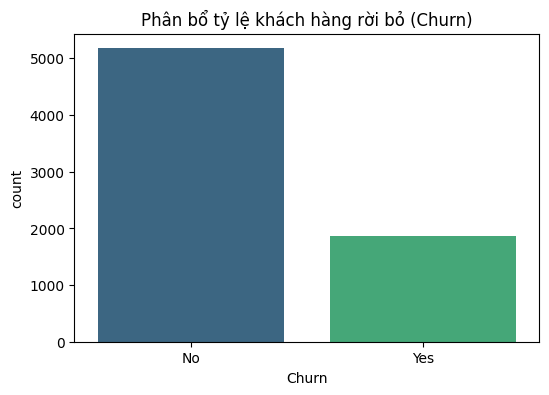

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, hue='Churn', palette='viridis', legend=False)
plt.title('Phân bổ tỷ lệ khách hàng rời bỏ (Churn)')
plt.show()

print(df['Churn'].value_counts(normalize=True) * 100)

In [ ]:
print("="*60)
print(f"Số lượng dữ liệu: {df.shape[0]} dòng, {df.shape[1]} cột")
print("="*60)

# 1. Kiểm tra trùng lặp
count_dupl = df.duplicated().sum()
print(f"Kiểm tra trùng lặp: {'Không có dòng trùng lặp' if count_dupl == 0 else f'Có {count_dupl} dòng trùng lặp'}")

# 2. Kiểm tra giá trị thiếu (Null/NaN)
count_missing = df.isnull().sum().sum()
print(f"Kiểm tra giá trị thiếu: {'Không có giá trị thiếu' if count_missing == 0 else f'Có {count_missing} giá trị thiếu cần xử lý'}")

# 3. Phân phối nhãn Churn (Tỷ lệ %)
print("-" * 60)
print("Phân phối nhãn Churn (Số lượng):")
print(df['Churn'].value_counts())
print("\nTỷ lệ phân phối (%):")
print((df['Churn'].value_counts(normalize=True) * 100).round(2))
print("-" * 60)
print("HOÀN TẤT KIỂM TRA THÔNG TIN")
print("="*60)

Số lượng dữ liệu: 7043 dòng, 22 cột
Kiểm tra trùng lặp: Không có dòng trùng lặp
Kiểm tra giá trị thiếu: Có 11 giá trị thiếu cần xử lý
------------------------------------------------------------
Phân phối nhãn Churn (Số lượng):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Tỷ lệ phân phối (%):
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64
------------------------------------------------------------
HOÀN TẤT KIỂM TRA THÔNG TIN


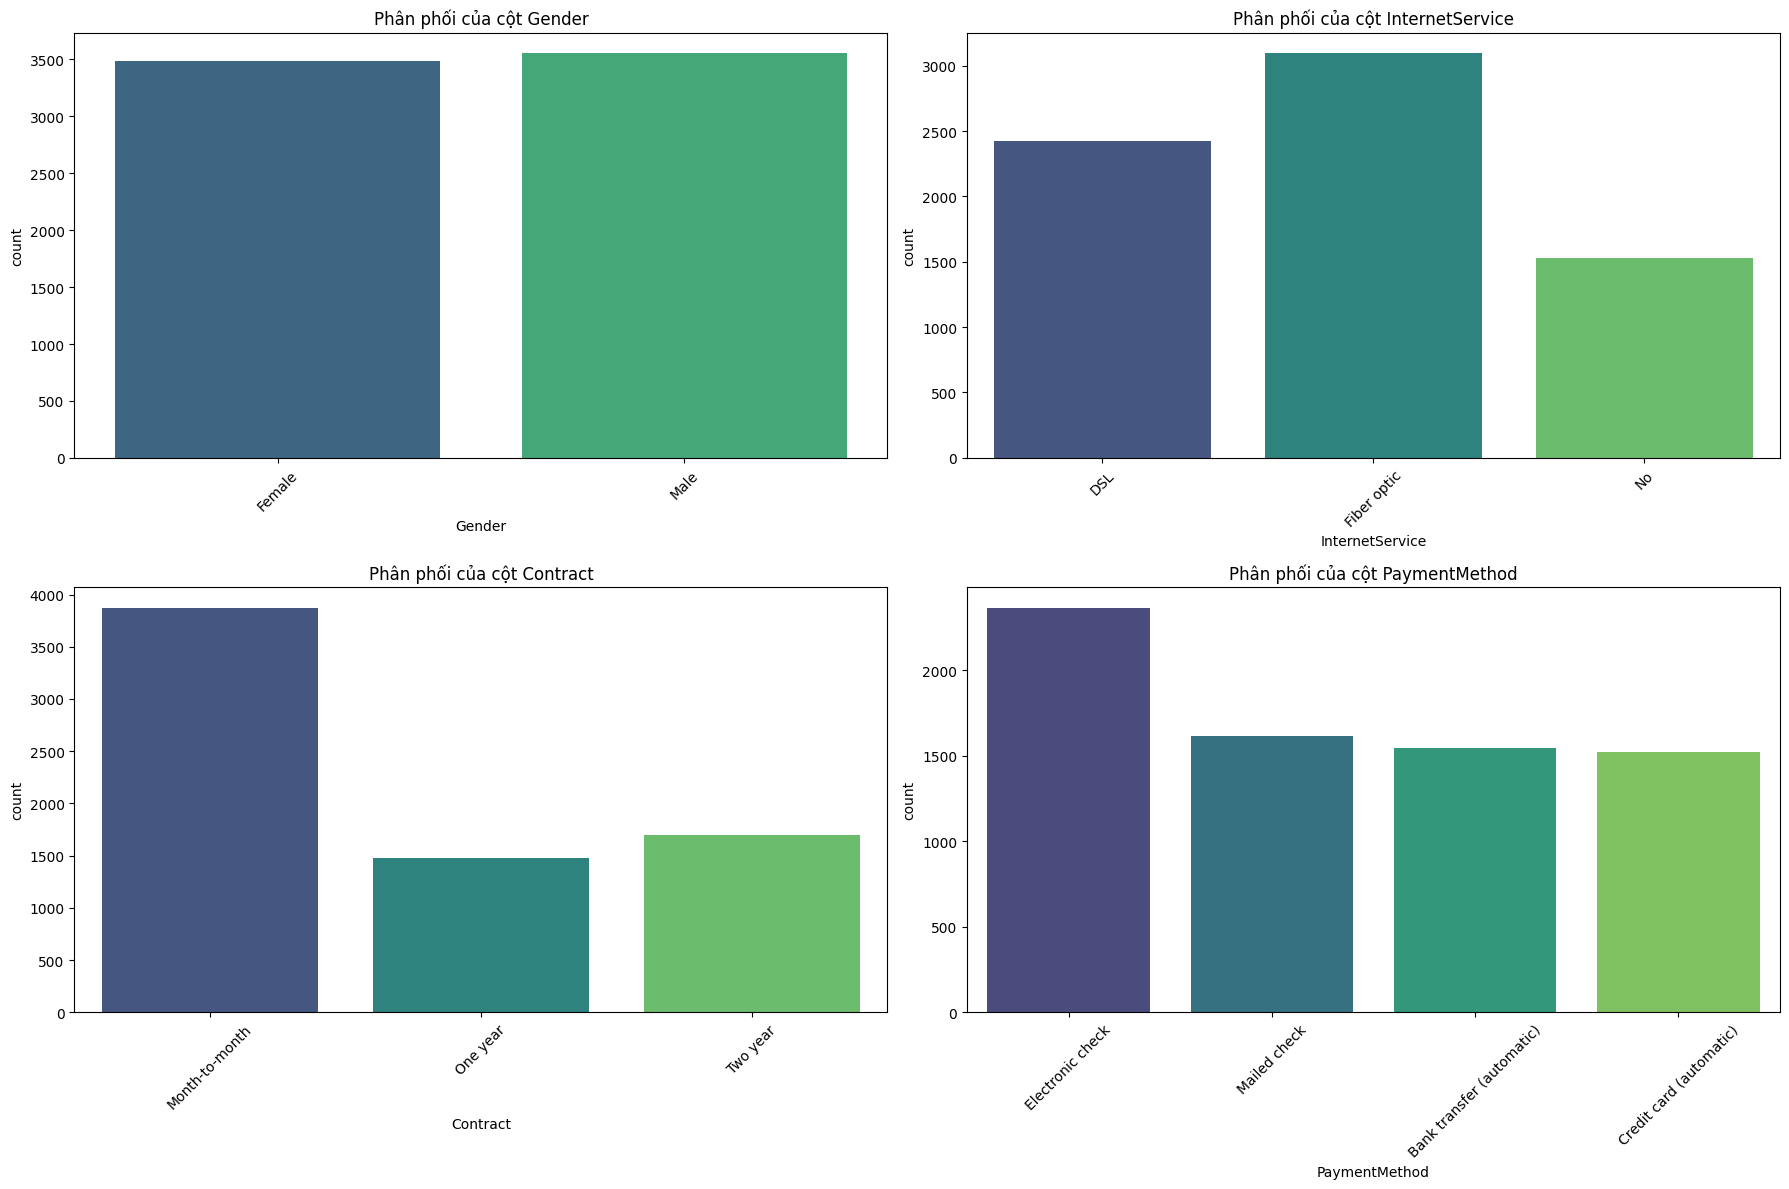

In [ ]:
# Danh sách các cột dạng chữ quan trọng cần quan sát
categorical_cols = ['Gender', 'InternetService', 'Contract', 'PaymentMethod']

# Khung hiển thị biểu đồ
plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    # Biểu đồ đếm số lượng cho từng loại trong cột
    sns.countplot(x=col, hue=col, data=df, palette='viridis', legend=False)
    plt.title(f'Phân phối của cột {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

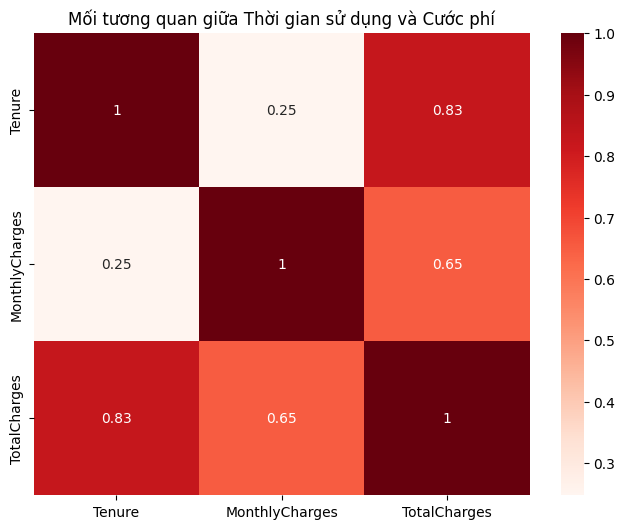

In [ ]:
# ép kiểu tạm thời để vẽ biểu đồ tương quan (Heatmap)
numeric_cols = df[['Tenure', 'MonthlyCharges']].copy()
numeric_cols['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Reds')
plt.title('Mối tương quan giữa Thời gian sử dụng và Cước phí')
plt.show()

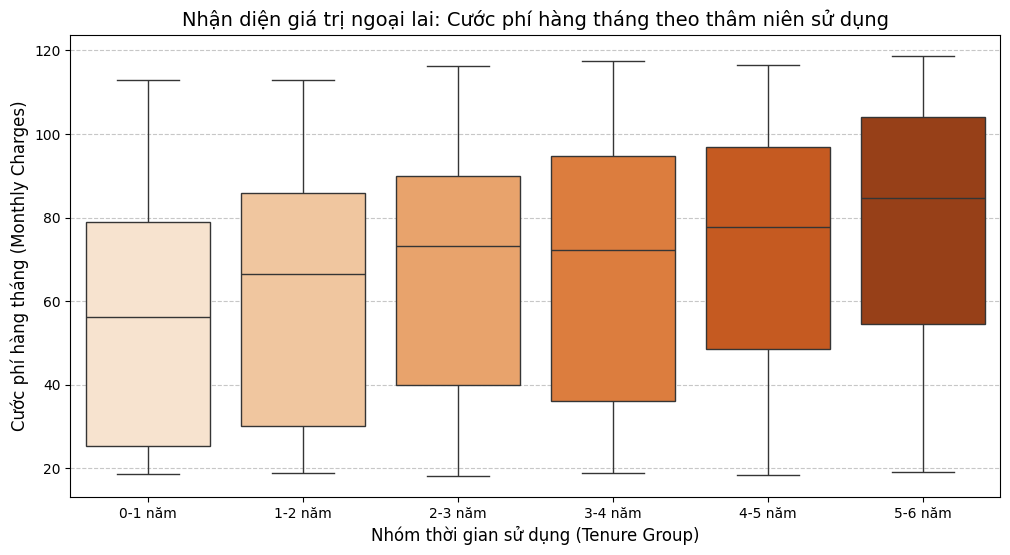

--- DANH SÁCH CÔ LẬP (352 trường hợp có cước phí cao top 5%) ---


,CustomerID,Tenure,MonthlyCharges,TotalCharges,Churn
15,3655-SNQYZ,69,113.25,7895.15,No
57,5067-XJQFU,66,108.45,7076.35,No
59,5954-BDFSG,72,107.50,7853.7,No
72,1891-QRQSA,64,111.60,7099,No
75,2673-CXQEU,56,110.50,6139.5,No


In [ ]:
df['Tenure_group'] = pd.cut(df['Tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
                            labels=['0-1 năm', '1-2 năm', '2-3 năm', '3-4 năm', '4-5 năm', '5-6 năm'])
# 1. Vẽ biểu đồ Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tenure_group', y='MonthlyCharges', data=df, hue='Tenure_group', palette='Oranges', legend=False)

plt.title('Nhận diện giá trị ngoại lai: Cước phí hàng tháng theo thâm niên sử dụng', fontsize=14)
plt.xlabel('Nhóm thời gian sử dụng (Tenure Group)', fontsize=12)
plt.ylabel('Cước phí hàng tháng (Monthly Charges)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Percentile (Top 5% cước phí cao nhất)
threshold = df['MonthlyCharges'].quantile(0.95)
abnormal_bills = df[df['MonthlyCharges'] > threshold]

print(f"--- DANH SÁCH CÔ LẬP ({len(abnormal_bills)} trường hợp có cước phí cao top 5%) ---")
cols_to_show = ['CustomerID', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

if not abnormal_bills.empty:
    display(abnormal_bills[cols_to_show].head())

# 3. Tiền xử lý dữ liệu (Data Preprocessing)

In [ ]:
# 1. XỬ LÝ DỮ LIỆU THIẾU, LOẠI BỎ DỮ LIỆU THỪA KO CẦN THIẾT
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Xử lý giá trị thiếu (NaN)
df.dropna(subset=['TotalCharges'], inplace=True)

# Loại bỏ CustomerID
if 'CustomerID' in df.columns:
    df.drop(columns=['CustomerID'], inplace=True)

print(f"Làm sạch xong! Số dòng còn lại: {df.shape[0]}")

Làm sạch xong! Số dòng còn lại: 7032


In [ ]:
# 2. MÃ HÓA DỮ LIỆU DẠNG CHUỖI -> SỐ
# Tạo bản sao
df_encoded = df.copy()
le = LabelEncoder()

# Tìm và Mã hóa các cột dạng chữ (object)
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("Dữ liệu sau khi đã chuyển sang số hoàn toàn:")
display(df_encoded.head())

Dữ liệu sau khi đã chuyển sang số hoàn toàn:


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,0-1 năm
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,2-3 năm
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,0-1 năm
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,3-4 năm
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,0-1 năm


In [ ]:
# 3. CHUẨN HÓA DỮ LIỆU DẠNG SỐ SAU KHI ĐÃ MÃ HÓA
scaler = StandardScaler()
num_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print("Dữ liệu sau khi chuẩn hóa (3 cột số):")
display(df_encoded[num_cols].head())

Dữ liệu sau khi chuẩn hóa (3 cột số):


,Tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457


In [ ]:
# 1. Chuẩn bị tập đặc trưng X (Loại bỏ các cột không dùng để huấn luyện)
X = df_encoded.drop(columns=['Churn', 'Tenure_group', 'CustomerID'], errors='ignore')

# 2. Xác định biến mục tiêu y
y = df_encoded['Churn']

# 3. Chia tập dữ liệu theo tỷ lệ 80% Train - 20% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Kiểm tra lại kích thước dữ liệu
print(f"--- THÔNG TIN TẬP DỮ LIỆU ---")
print(f"Dữ liệu huấn luyện: {X_train.shape[0]} dòng, {X_train.shape[1]} cột")
print(f"Dữ liệu kiểm tra: {X_test.shape[0]} dòng, {X_test.shape[1]} cột")
print(f"Các cột dùng để huấn luyện: {list(X.columns)}")

--- THÔNG TIN TẬP DỮ LIỆU ---
Dữ liệu huấn luyện: 5625 dòng, 19 cột
Dữ liệu kiểm tra: 1407 dòng, 19 cột
Các cột dùng để huấn luyện: ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


# 4. Huấn luyện mô hình (Model Training)

In [ ]:
# 1. Khởi tạo mô hình với 100 cây quyết định
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Huấn luyện mô hình trên tập Train (5625 dòng bạn đã chia)
rf_model.fit(X_train, y_train)

# 3. Dự đoán trên tập Test (1407 dòng)
y_pred = rf_model.predict(X_test)

print("Đã hoàn thành huấn luyện và dự báo!")

Đã hoàn thành huấn luyện và dự báo!


# 5. Đánh giá và Phân tích kết quả (Model Evaluation)

--- BÁO CÁO HIỆU SUẤT MÔ HÌNH ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



<Figure size 800x600 with 0 Axes>

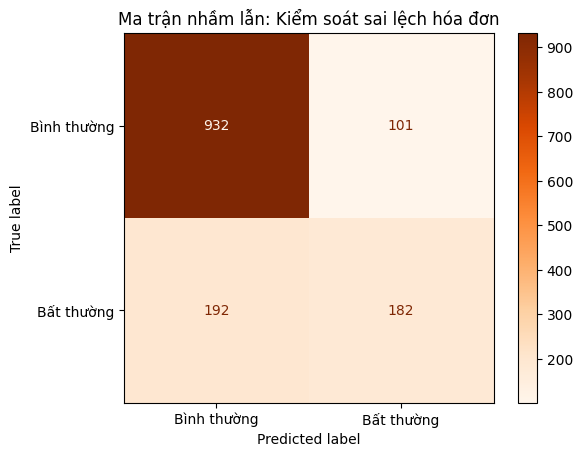

In [ ]:
# 1. Báo cáo hiệu suất chi tiết
print("--- BÁO CÁO HIỆU SUẤT MÔ HÌNH ---")
print(classification_report(y_test, y_pred))

# Vẽ Ma trận nhầm lẫn (Confusion Matrix)
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bình thường', 'Bất thường'])
disp.plot(cmap='Oranges')
plt.title('Ma trận nhầm lẫn: Kiểm soát sai lệch hóa đơn')
plt.show()

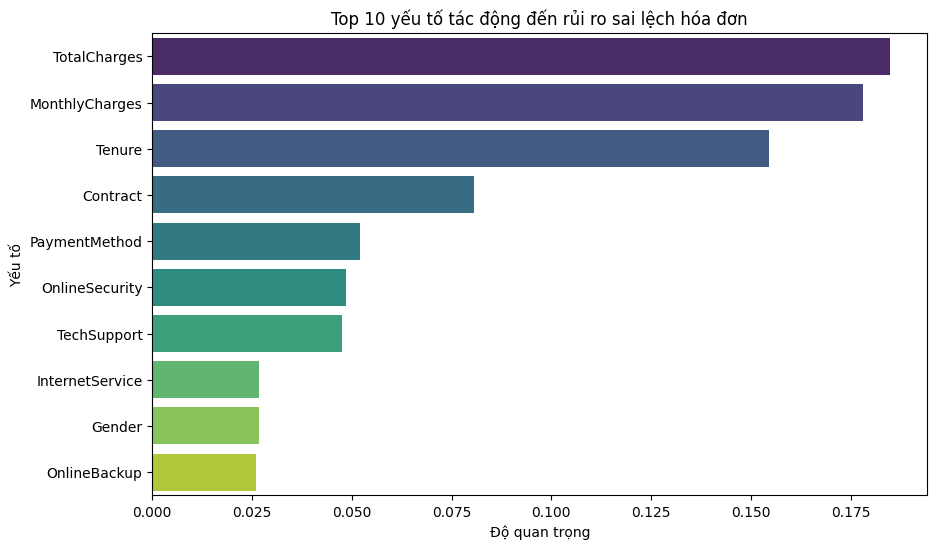

In [ ]:
# 2. Tầm quan trọng của các yếu tố (Feature Importance)
importances = rf_model.feature_importances_
feature_df = pd.DataFrame({'Yếu tố': X.columns, 'Độ quan trọng': importances})
feature_df = feature_df.sort_values(by='Độ quan trọng', ascending=False)

# Vẽ biểu đồ Top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Độ quan trọng', y='Yếu tố', data=feature_df.head(10), hue='Yếu tố', palette='viridis', legend=False)
plt.title('Top 10 yếu tố tác động đến rủi ro sai lệch hóa đơn')
plt.show()

# 6. Đóng gói

In [ ]:
import joblib

# 1. Lưu mô hình Random Forest (đã đạt Acc 79%)
joblib.dump(rf_model, 'model_random_forest.pkl')

# 2. Lưu bộ chuẩn hóa (Scaler) - Rất quan trọng để dữ liệu demo khớp với lúc huấn luyện
joblib.dump(scaler, 'data_scaler.pkl')

# 3. Lưu danh sách các đặc trưng (features) để đảm bảo thứ tự cột khi demo
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')

['feature_columns.pkl']